In [57]:
# preprocess+EDA+feature selection
# extract i/p and o/p cols
# scale the values
# train test split
# train the mode;
# evaluate the model/model selection
# deploy the mode

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df= pd.read_csv('csv/placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [60]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [61]:
df.shape

(100, 4)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [63]:
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [64]:
plt.style.use('dark_background')

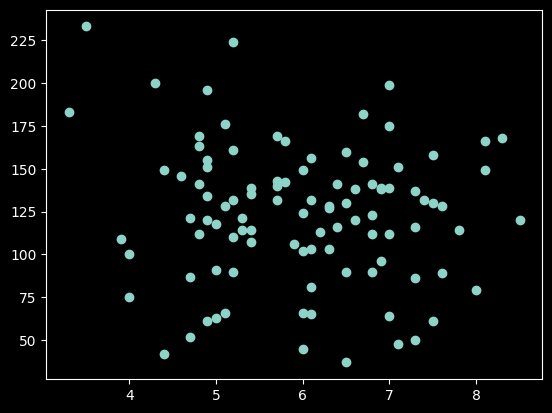

In [65]:
plt.scatter(df['cgpa'],df['iq'])

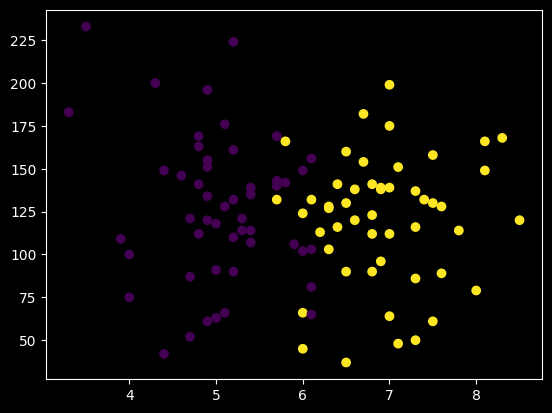

In [68]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [69]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scalar=StandardScaler()

In [74]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
clf=LogisticRegression()

In [77]:
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
y_predict

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [80]:
y_test

40    0
52    1
90    1
27    1
97    1
83    1
30    1
39    0
33    0
58    1
Name: placement, dtype: int64

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(y_test,y_predict)

0.9

In [85]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

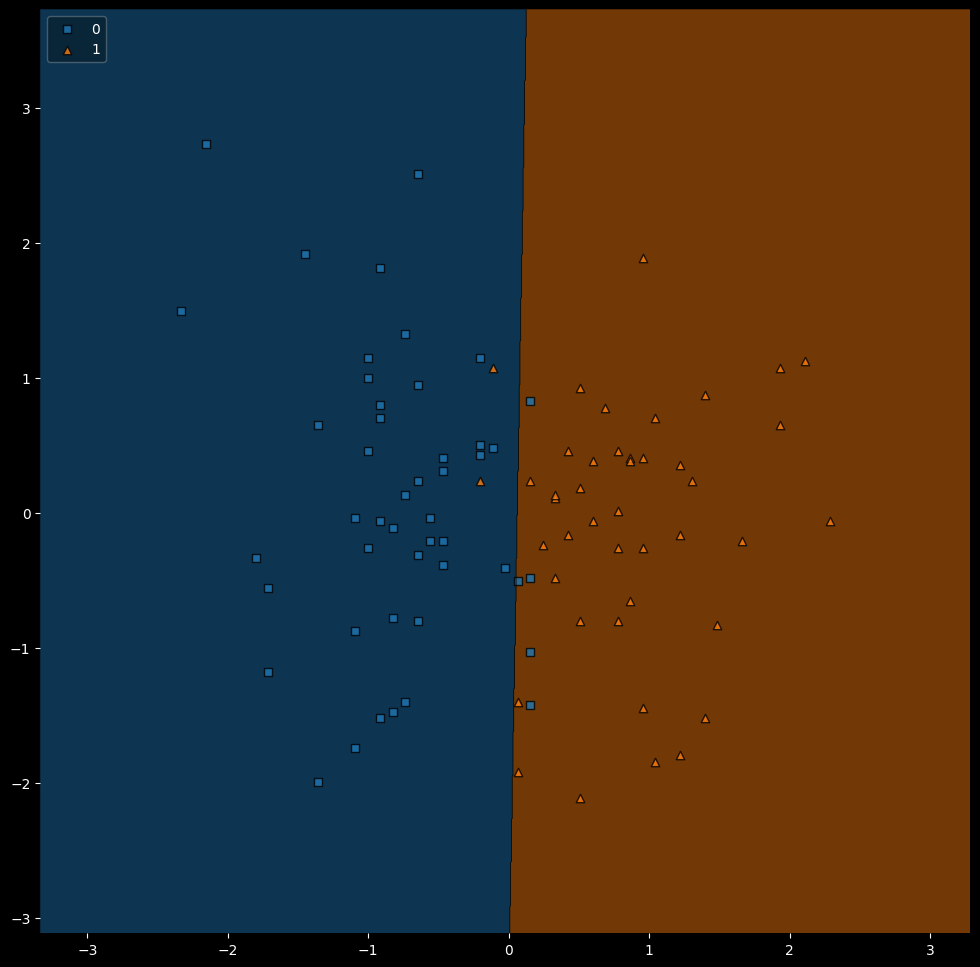

In [92]:
plt.figure(figsize=(12,12))
plot_decision_regions(x_train,y_train.to_numpy(),clf=clf,legend=2)

In [93]:
import pickle

In [94]:
pickle.dump(clf,open('model.pkl','wb'))